## Elastic Net Regression

Elastic Net Regression is a regularized version of linear regression that includes the L1 and L2 penalty term. Essentially, the model combines the effects of Ridge and Lasso regression. By tuning the hyperparameter alpha, you can determine how strongly the model promotes sparsity and coefficient shrinkage.

The optimization objective is the following:

minimize => sum((y-yhat)**2) + L1_alpha x sum(abs(coef)) + L2_alpha x sum(coef^2)

In [70]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
n = 100

uninformative_feat = np.random.randn(n, 1)
informative_feat = np.random.randn(n, 1)
ones = np.ones((n, 1))

noise = np.random.randn(n, 1)
noise_strength = 2

w = np.array([-3, 0, 5])

X = np.concatenate([informative_feat, uninformative_feat, ones], axis=1)
y = informative_feat*w[0] + w[2] + noise_strength*noise

print(X.shape)
print(y.shape)

(100, 3)
(100, 1)


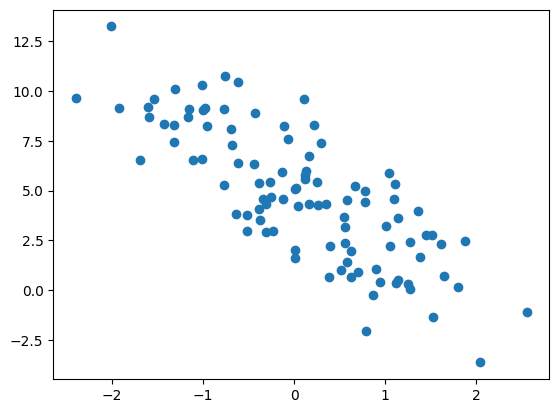

In [72]:
plt.scatter(X[:, 0], y)

In [73]:
class ElasticNet:

  def __init__(self, lr, l1_alpha, l2_alpha, epochs):

    self.lr = lr
    self.l1_alpha = l1_alpha
    self.l2_alpha = l2_alpha
    self.l1_thresh = l1_alpha * lr
    self.epochs = epochs
    self.w = None

  def smooth(self, rho):

    if rho < -self.l1_thresh:

      return rho + self.l1_thresh

    elif rho > self.l1_thresh:

      return rho - self.l1_thresh

    else:

      return 0

  def fit(self, X, y):

    self.w = np.random.randn(X.shape[1], 1)

    for epoch in range(self.epochs):

      ols_grad = (-2/X.shape[0]) * X.T @ (y-X@self.w)
      l2_grad = self.l2_alpha * 2 * self.w

      self.w -= self.lr*(ols_grad+l2_grad)

      l1_grad = self.l1_alpha * np.vectorize(self.smooth)(self.w)
      self.w -= self.lr*l1_grad


  def predict(self, X):

    return X @ self.w




In [74]:
els = ElasticNet(0.1, 0.5, 0, 20)

els.fit(X, y)
els.w

array([[-1.99375481],
       [-0.14705976],
       [ 3.90536832]])

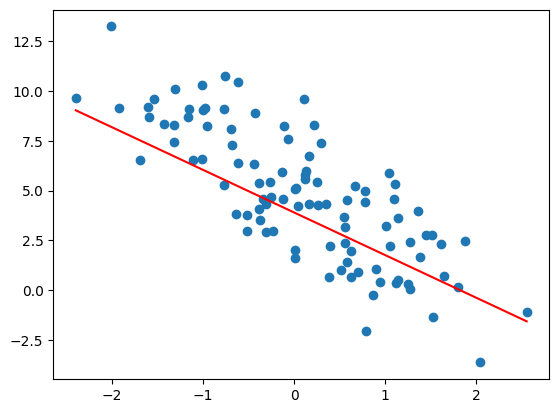

In [75]:
lnspace = np.linspace(X[:, 0].min(axis=0), X[:, 0].max(axis=0), X.shape[0])
lnspace = np.reshape(lnspace, (-1, 1))
x_lnspace = np.concat([lnspace, lnspace, np.ones((X.shape[0], 1))], axis=1)

plt.scatter(X[:, 0], y)
plt.plot(lnspace, els.predict(x_lnspace), color="r")

True Weights:
[-3  0  5]


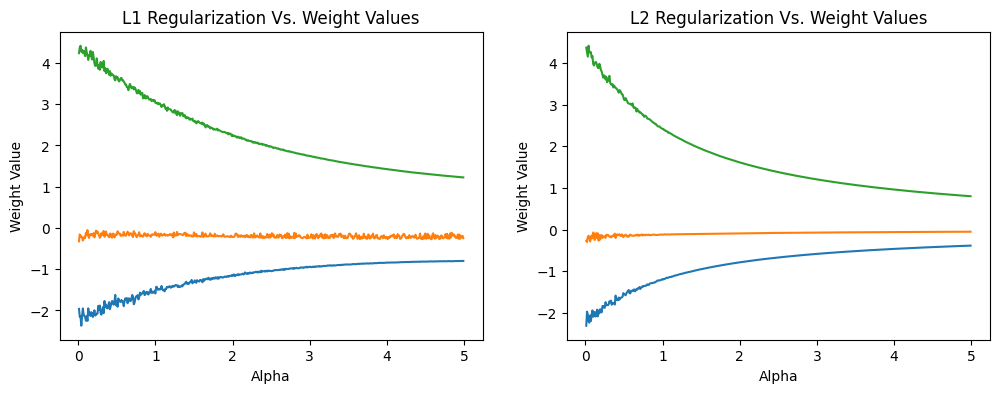

In [80]:
alphas = np.arange(0.01, 5, 0.01)

weights = []

for alpha in alphas:

  els = ElasticNet(0.1, alpha, 0, 10)
  els.fit(X, y)
  weights.append(els.w)

weights = np.reshape(np.array(weights), (-1, X.shape[1]))
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i in range(X.shape[1]):

  ax[0].plot(alphas, weights[:, i])

ax[0].set_title("L1 Regularization Vs. Weight Values")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Weight Value")


weights = []

for alpha in alphas:

  els = ElasticNet(0.1, 0, alpha, 10)
  els.fit(X, y)
  weights.append(els.w)

weights = np.reshape(np.array(weights), (-1, X.shape[1]))

for i in range(X.shape[1]):

  ax[1].plot(alphas, weights[:, i])

ax[1].set_title("L2 Regularization Vs. Weight Values")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Weight Value")

print("True Weights:")
print(w)
